<a href="https://www.kaggle.com/code/metin23/telco-prediction-hyperparameter-visualization?scriptVersionId=166668378" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# <center><font >Telco Prediction &  Hyperparameter Optimization & Visualization<font><center>

![](https://miro.medium.com/v2/resize:fit:1358/0*8Iu_eymr6eR-YuQw)

# Problem

### It is expected to develop a machine learning model that can predict customers who will leave the company.

# <a id = "1"></a> <center><font > Dataset Story <font><center>

### Telco customer churn data includes information about a fictitious telecom company that provided home phone and Internet services to 7,043 customers in California in the third quarter. It shows which customers left, stayed, or signed up for their service.

* **CustomerId:** Customer Id's
* **Gender:** Gender
* **SeniorCitizen:** Whether the customer is elderly(1, 0)
* **Partner:** Whether the customer has a partner (Yes, No)
* **Dependents:** Whether the customer has dependents (Yes, No)
* **tenure:** Number of months the customer stays with the company
* **PhoneService:** Whether the customer has phone service (Yes, No)
* **MultipleLines:** Whether the customer has more than one line (Yes, No, No telephone service)
* **InternetService:** Customer's internet service provider (DSL, Fiber optic, No)
* **OnlineSecurity:** Whether the customer has online security (Yes, No, no internet service)
* **OnlineBackup:** Whether the customer has an online backup (Yes, No, no internet service)
* **DeviceProtection:** Whether the customer has device protection (Yes, No, no Internet service)
* **TechSupport:** Whether the customer receives technical support (Yes, No, no internet service)
* **StreamingTV:** Whether the customer has TV broadcasting (Yes, No, no Internet service)
* **StreamingMovies:** Whether the customer is streaming movies (Yes, No, No internet service)
* **Contract:** period of the customer (Month to month, One year, Two years)
* **PaperlessBilling:** Whether the customer has a paperless bill (Yes, No)
* **PaymentMethod:** Customer's payment method (Electronic check, Postal check, Bank transfer (automatic), Credit card (automatic))
* **MonthlyCharges:** Amount collected from the customer monthly
* **TotalCharges:** Total amount collected from the customer
* **Churn:** Whether the customer uses it (Yes or No)

# <center><font >Contents<font><center>   
1. [Dataset Story](#1)
1. [Import Libraries](#2)
1. [Understand the Data](#3)
1. [Exploratory Data Analysis](#4)
1. [Data Manipulation](#5)
1. [Data Visualization](#6) 
1. [Feature Engineering](#7)  
1. [Model Evaluations and Prediction](#8)
1. [Hyperparameter Optimization](#9)

------------------------------------------------------------------------

# <a id = "2"></a> <center><font >Import Libraries <font><center>

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
from matplotlib import pyplot as plt
import missingno as msno
import plotly.express as px


from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import  LabelEncoder, StandardScaler, RobustScaler
from sklearn.model_selection import GridSearchCV, cross_validate
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report
from sklearn.metrics import log_loss
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
import warnings


In [2]:
warnings.filterwarnings("always")
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.width', 500)

----------------------------------------

# <a id = "3"> </a> <center><font >Understand the Data<font><center>

In [3]:
df =pd.read_csv("/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.850,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.950,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.850,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.300,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.700,151.65,Yes


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
def check_df(dataframe, head=5):
    print("##################### Shape #####################")
    print(dataframe.shape)
    print("##################### Types #####################")
    print(dataframe.dtypes)
    print("##################### NA #####################")
    print(dataframe.isnull().sum())
    print("##################### Quantiles #####################")
    print(dataframe.describe([0, 0.05, 0.50, 0.95, 0.99, 1]).T)

check_df(df)

##################### Shape #####################
(7043, 21)
##################### Types #####################
customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object
##################### NA #####################
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        

In [7]:
# nunique values of  columns
for col in df.columns:
    print(col,":",df[col].nunique())
    print("####")

customerID : 7043
####
gender : 2
####
SeniorCitizen : 2
####
Partner : 2
####
Dependents : 2
####
tenure : 73
####
PhoneService : 2
####
MultipleLines : 3
####
InternetService : 3
####
OnlineSecurity : 3
####
OnlineBackup : 3
####
DeviceProtection : 3
####
TechSupport : 3
####
StreamingTV : 3
####
StreamingMovies : 3
####
Contract : 3
####
PaperlessBilling : 2
####
PaymentMethod : 4
####
MonthlyCharges : 1585
####
TotalCharges : 6531
####
Churn : 2
####


----------------------------------------

# <a id = "4"></a>  <center><font >Exploratory Data Analysis<font><center>

- What should be **noted here** is that the "**Total Charges**" variable is entered as **object** and is entered into the **cat_but_car** variable.

- The data type of the "**Senior Citizen**" variable appears to be **numeric**, but it is a **categorical** variable.

In [8]:
#df["TotalCharges"]= df["TotalCharges"].astype(float)
#ValueError: could not convert string to float: ' '

df["TotalCharges"]= pd.to_numeric(df["TotalCharges"],errors="coerce")

df["SeniorCitizen"] = df["SeniorCitizen"].astype("object")

In [9]:
print(df["SeniorCitizen"].dtype, df["TotalCharges"].dtype)

object float64


#### **Identifying numerical and categorical variables.**

In [10]:
def grab_col_names(dataframe, cat_th=10, car_th=20):
    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')
    return cat_cols, num_cols, cat_but_car


In [11]:
cat_cols, num_cols, cat_but_car =grab_col_names(dataframe=df)

Observations: 7043
Variables: 21
cat_cols: 17
num_cols: 3
cat_but_car: 1
num_but_cat: 0


In [12]:
cat_cols

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

In [13]:
num_cols

['tenure', 'MonthlyCharges', 'TotalCharges']

In [14]:
cat_but_car

['customerID']

In [15]:
def cat_summary(dataframe, col_name, plot=False):
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)})) 
    # buradaki yüzdelik değişim tüm verideki etkisini ölçüyoruz.
    print("##########################################")
    if plot:
        sns.countplot(x=dataframe[col_name], data=dataframe)
        plt.show()

In [16]:
for col in cat_cols:
    cat_summary(df, col)

        gender  Ratio
gender               
Male      3555 50.476
Female    3488 49.524
##########################################
               SeniorCitizen  Ratio
SeniorCitizen                      
0                       5901 83.785
1                       1142 16.215
##########################################
         Partner  Ratio
Partner                
No          3641 51.697
Yes         3402 48.303
##########################################
            Dependents  Ratio
Dependents                   
No                4933 70.041
Yes               2110 29.959
##########################################
              PhoneService  Ratio
PhoneService                     
Yes                   6361 90.317
No                     682  9.683
##########################################
                  MultipleLines  Ratio
MultipleLines                         
No                         3390 48.133
Yes                        2971 42.184
No phone service            682  9.683
######

In [17]:
def target_num(dataframe, target, num_cols):
    for col in num_cols:
        print(col, ":", len(dataframe[col].value_counts()))
        
    print("\n\n",dataframe.groupby(target)[num_cols].mean())

In [18]:
target_num(df,"Churn",num_cols)

tenure : 73
MonthlyCharges : 1585
TotalCharges : 6530


        tenure  MonthlyCharges  TotalCharges
Churn                                      
No     37.570          61.265      2555.344
Yes    17.979          74.441      1531.796


---------------------------------------------------------

#  <a id = "5"></a> <center><font >Data Manipulation <font><center>

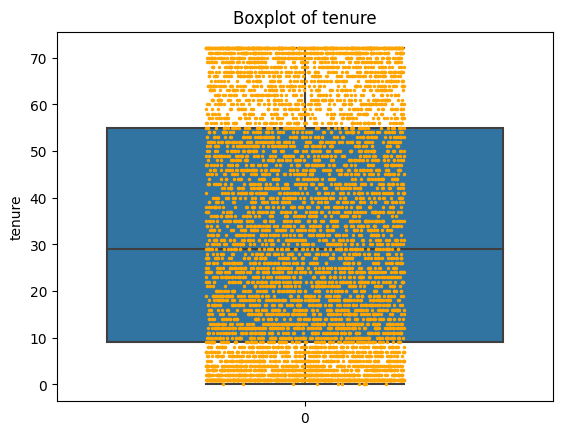

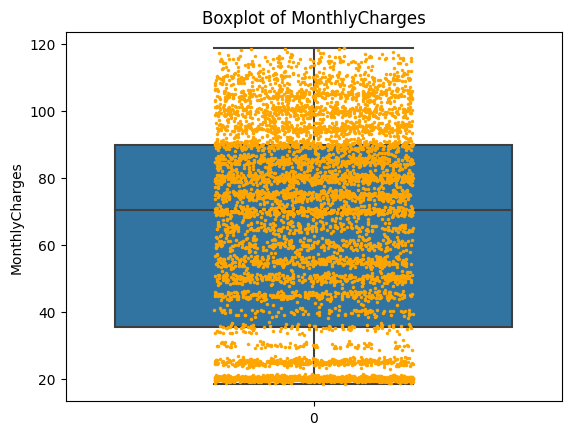

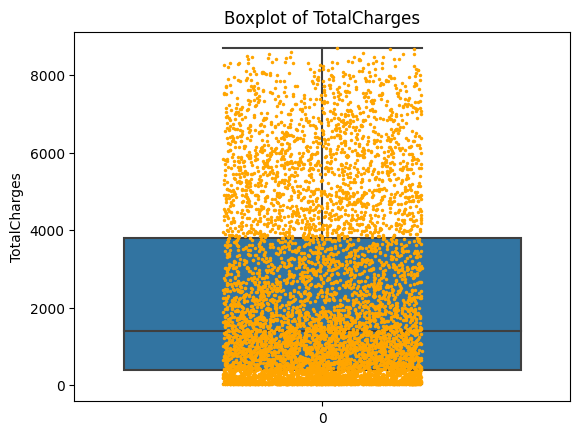

In [19]:
for col in num_cols:
    ax =sns.boxplot( data=df[col])
    ax =sns.stripplot(  data=df[col], color="orange", jitter=0.2, size=2.5)
    plt.title(f'Boxplot of {col}')
    plt.show()

- The "**Tenure**" variable has a value of 0, but the number of **months** the customer stays **cannot be 0**.
- The "**TotalCharges**" variable may receive **NaN** values due to the "**coerce**" parameter in the **to_numeric** function, which we converted to a numeric data type.

In [20]:
df[np.isnan(df['TotalCharges'])].index

Index([488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754], dtype='int64')

In [21]:
df[df['tenure'] == 0].index

Index([488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754], dtype='int64')

In [22]:
df.drop(labels=df[df['tenure'] == 0].index, axis=0, inplace=True)

Since the incorrect values in the **Total Charges** and **tenure** variables were on the **same line**, the missing values were entered by **deleting them.**

In [23]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

<Axes: >

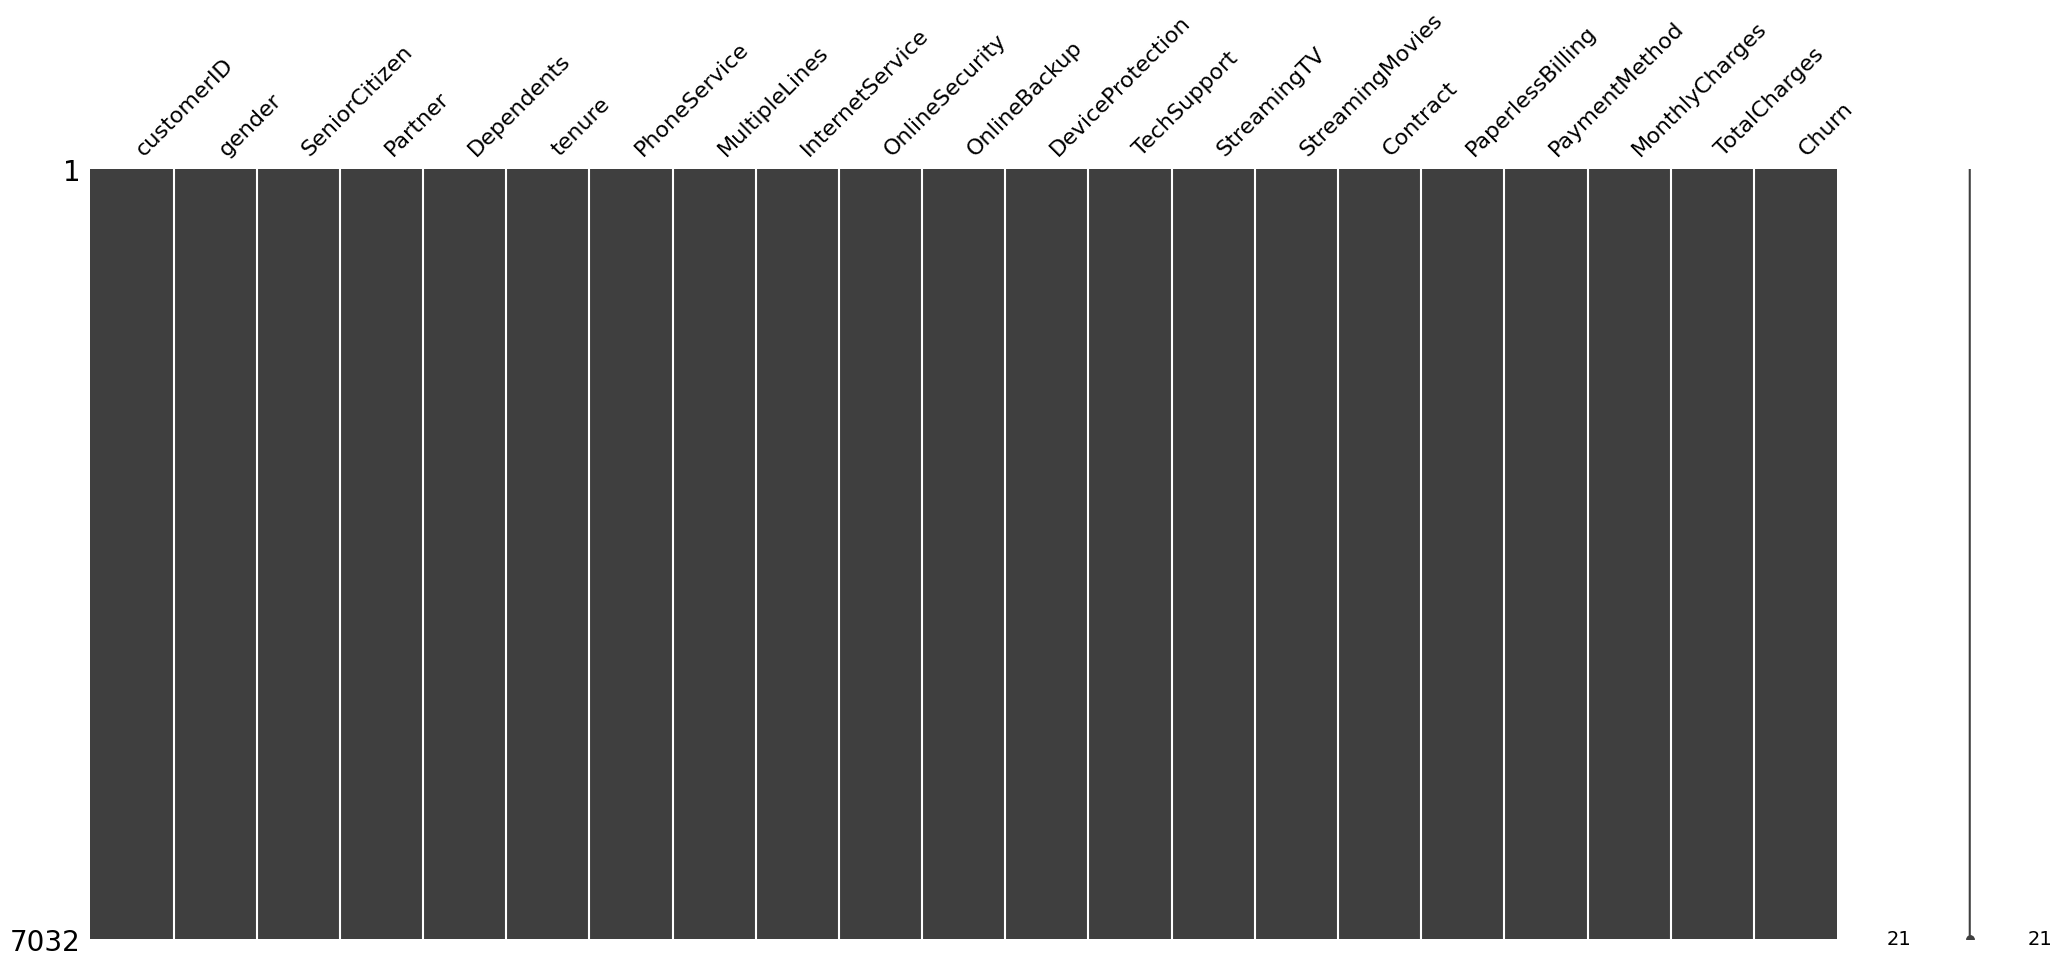

In [24]:
# Visualize missing values as a matrix
msno.matrix(df)

In [25]:
df = df.drop(['customerID'], axis = 1)
# customerID is not necasary

#  <a id = "6"></a><center><font >Data Visualization <font><center>

In [26]:
fig = px.sunburst(data_frame=df,
                  path = ['gender', 'Churn'],
                  title="<b> Churn by gender<b>")
                 
fig.show()

In [27]:
df1 = pd.DataFrame(dict(
    stage = ['Partner', 'PhoneService', 'PaperlessBilling', 
             'Partner', 'PhoneService', 'PaperlessBilling'],
    
    percentage = [df["Partner"].value_counts()[1],df["PhoneService"].value_counts()[0], df["PaperlessBilling"].value_counts()[0],
              df["Partner"].value_counts()[0], df["PhoneService"].value_counts()[1], df["PaperlessBilling"].value_counts()[1]],
    Churn = ['Yes', 'Yes', 'Yes', 
                'No', 'No', 'No', ]))

fig = px.funnel(df1, x = 'percentage', 
                y = 'stage', 
                color = 'Churn')

fig.show()

In [28]:
fig = px.histogram(df, x="Churn", color="SeniorCitizen", title="<b>Chrun distribution Senior Citizen</b>")
fig.show()

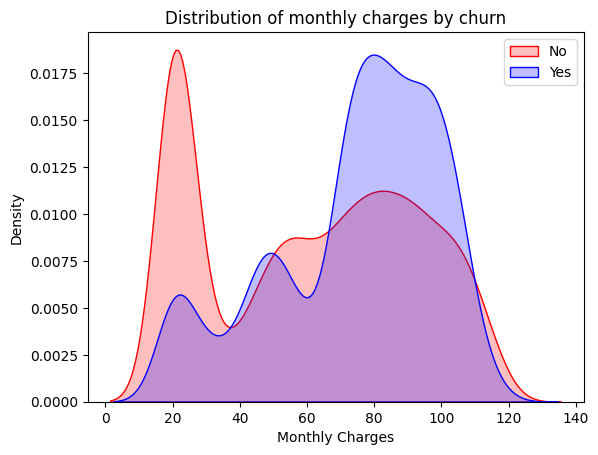

In [29]:

ax = sns.kdeplot(df.MonthlyCharges[(df["Churn"]=="No")], fill=True, color="r")
ax = sns.kdeplot(df.MonthlyCharges[(df["Churn"]=="Yes")], fill=True, color="b")
ax.legend(["No","Yes"],loc='upper right')
ax.set_xlabel('Monthly Charges')
ax.set_title('Distribution of monthly charges by churn')
plt.show()

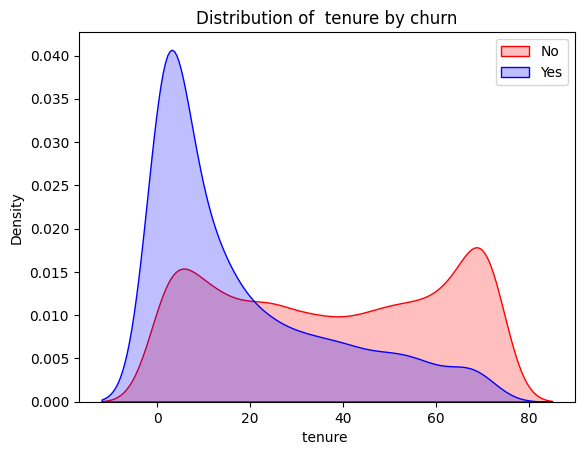

In [30]:
ax = sns.kdeplot(df.tenure[(df["Churn"]=="No")], fill=True, color="r")
ax = sns.kdeplot(df.tenure[(df["Churn"]=="Yes")], fill=True, color="b")
ax.legend(["No","Yes"],loc='upper right')
ax.set_xlabel('tenure ')
ax.set_title('Distribution of  tenure by churn')
plt.show()

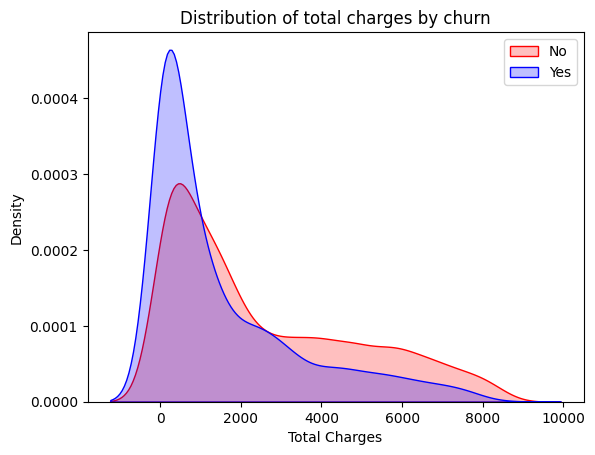

In [31]:
ax = sns.kdeplot(df.TotalCharges[(df["Churn"]=="No")], fill=True, color="r")
ax = sns.kdeplot(df.TotalCharges[(df["Churn"]=="Yes")], fill=True, color="b")
ax.legend(["No","Yes"],loc='upper right')
ax.set_xlabel('Total Charges')
ax.set_title('Distribution of total charges by churn')
plt.show()

#  <a id = "7"></a> <center><font >Feature Engineering <font><center>

In [32]:
ohe_cols = [col for col in cat_cols if col!="Churn"]
ohe_cols
df_one=pd.get_dummies(df,columns=ohe_cols,dtype=int,drop_first=True)

In [33]:
df_one.head()

,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,29.850,29.850,No,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0
1,34,56.950,1889.500,No,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
2,2,53.850,108.150,Yes,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
3,45,42.300,1840.750,No,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0
4,2,70.700,151.650,Yes,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0


In [34]:
labelencoder = LabelEncoder()
df_one["Churn"] = labelencoder.fit_transform(df_one["Churn"])

In [35]:
def distplot(feature, frame, color='r'):
    plt.figure(figsize=(8,3))
    plt.title("Distribution for {}".format(feature))
    ax = sns.distplot(frame[feature], color= color)

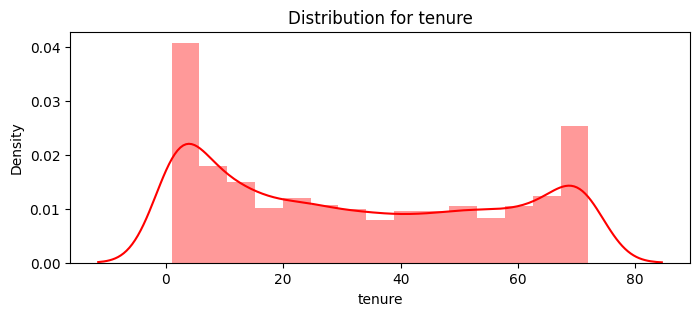

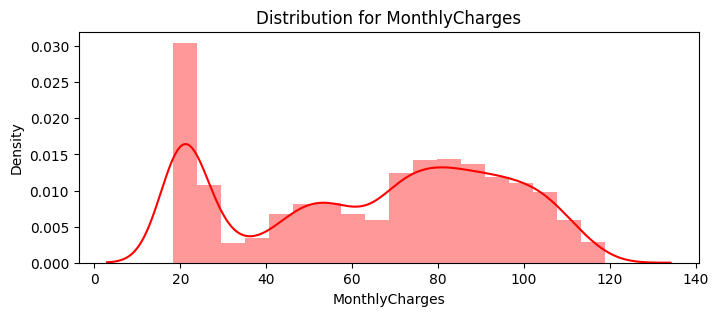

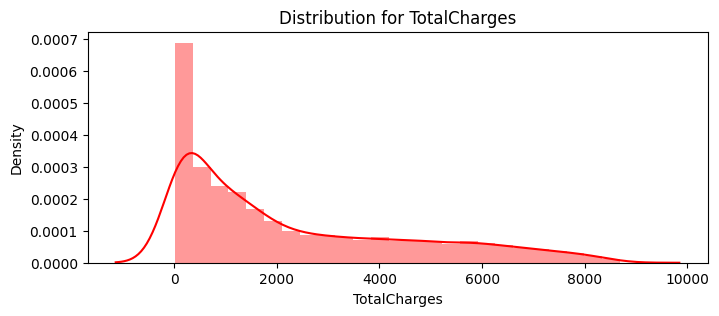

In [36]:
for feat in num_cols: 
    distplot(feat, df)

In [37]:
scaler = StandardScaler()
df_one[num_cols] = scaler.fit_transform(df[num_cols].astype('float64'))

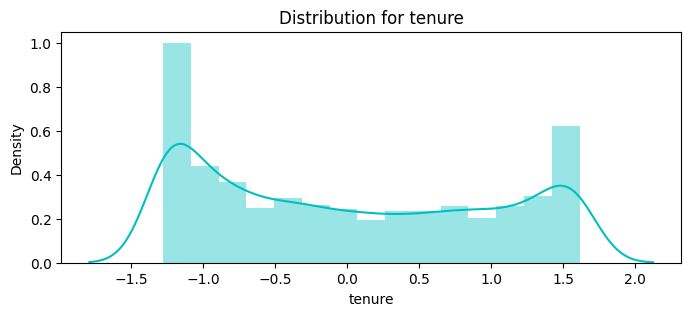

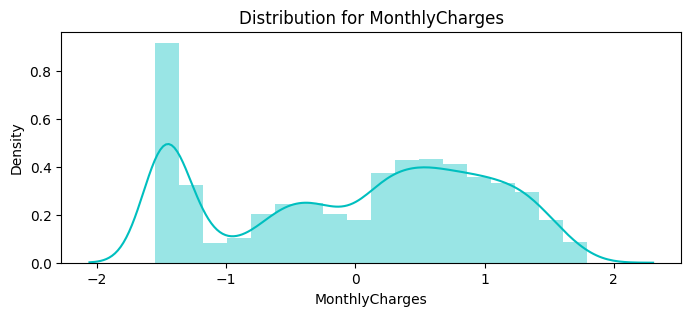

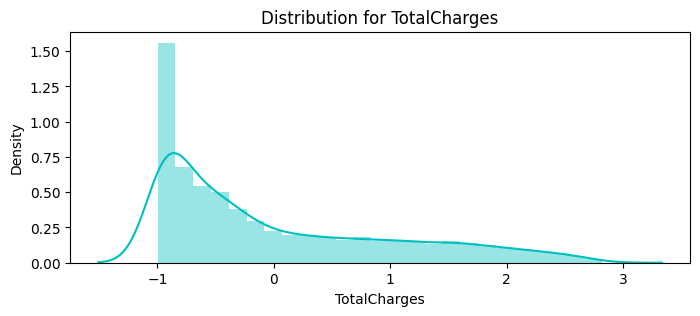

In [38]:
for feat in num_cols:
    distplot(feat, df_one[num_cols], color='c')

#  <a id = "8"></a><center><font >Model Evaluations and Prediction  <font><center>

In [39]:
y = df_one["Churn"]
X = df_one.drop(["Churn"], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=70)


In [40]:
def model(classifier,x_train,y_train,x_test,y_test,name):
    
    classifier.fit(x_train,y_train)
    prediction = classifier.predict(x_test)
    y_pred_prob = classifier.predict_proba(x_test)[:,1]
    roc_auc = roc_auc_score(y_test, y_pred_prob)
    print("Cross Validation Score : ",'{0:.2%}'.format(cross_val_score(classifier,x_train,y_train,cv = 5,scoring = 'roc_auc').mean()))
       
    print("ROC_AUC Score : ",'{0:.2%}'.format(roc_auc))
    
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    plt.plot([0, 1], [0, 1], 'k--' )
    plt.plot(fpr, tpr, label=f'AUC = {roc_auc:2f}',color = "r")
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{name} Regression ROC Curve',fontsize=16)
    plt.legend()    
    plt.show();
    
    
def model_evaluation(classifier,x_test,y_test):
    
    # Confusion Matrix
    cm = confusion_matrix(y_test,classifier.predict(x_test))
    names = ['True Neg','False Pos','False Neg','True Pos']
    counts = [value for value in cm.flatten()]
    percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names,counts,percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cm,annot = labels,cmap = 'Blues',fmt ='')
    
    # Classification Report
    print(classification_report(y_test,classifier.predict(x_test)))

In [41]:
def model_summary(model_m,name):
    model(model_m,X_train,y_train,X_test,y_test,name)
    model_evaluation(model_m,X_test,y_test)

#### KNN 

Cross Validation Score :  77.76%
ROC_AUC Score :  79.67%


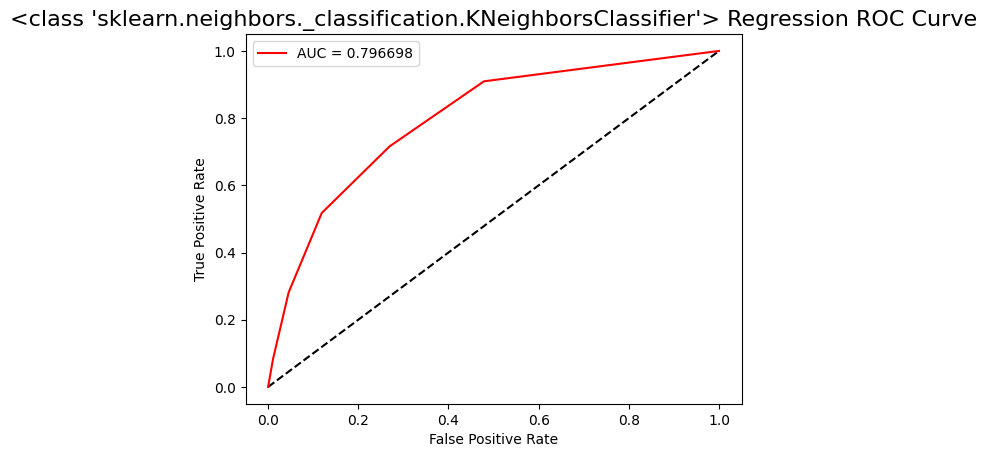

              precision    recall  f1-score   support

           0       0.82      0.88      0.85      1009
           1       0.63      0.52      0.57       398

    accuracy                           0.78      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.77      0.78      0.77      1407



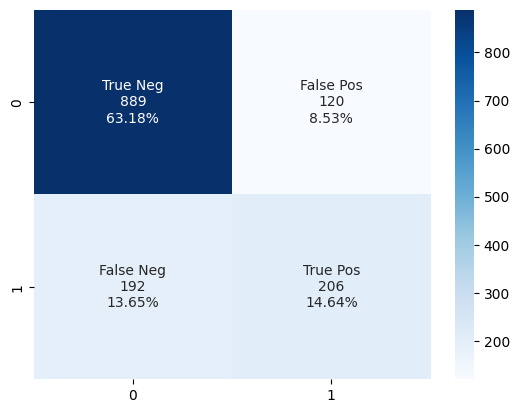

In [42]:
knn_model = KNeighborsClassifier() 
model_summary(knn_model,KNeighborsClassifier)

#### Logictic Regression 

Cross Validation Score :  84.30%
ROC_AUC Score :  84.85%


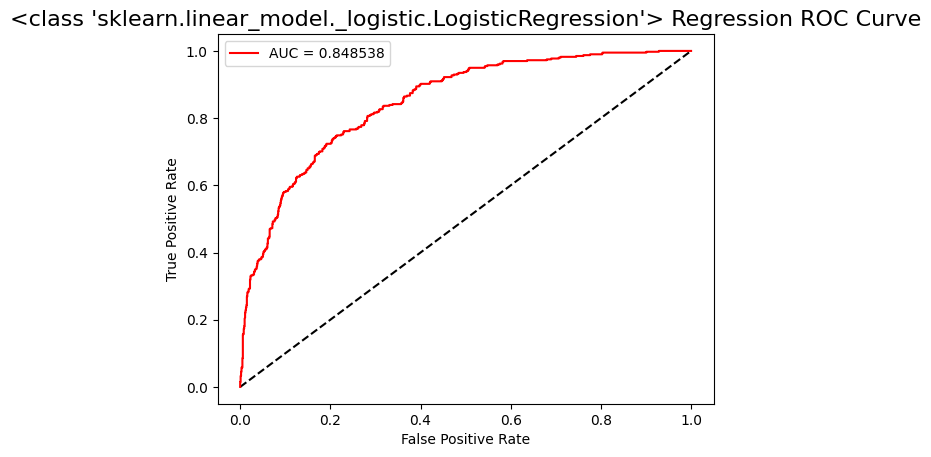

              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1009
           1       0.71      0.53      0.61       398

    accuracy                           0.81      1407
   macro avg       0.77      0.72      0.74      1407
weighted avg       0.80      0.81      0.80      1407



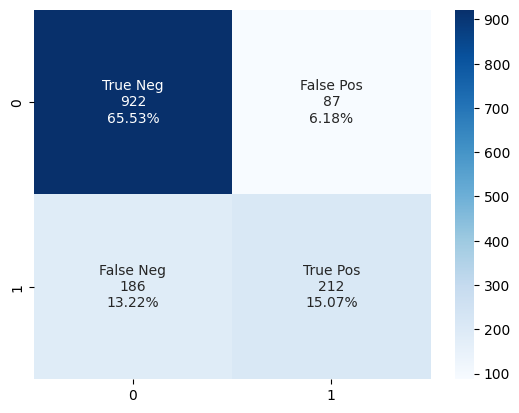

In [43]:
log_model = LogisticRegression()
model_summary(log_model,LogisticRegression)

#### Extreme Gradient Boosting Classifier

Cross Validation Score :  81.31%
ROC_AUC Score :  83.14%


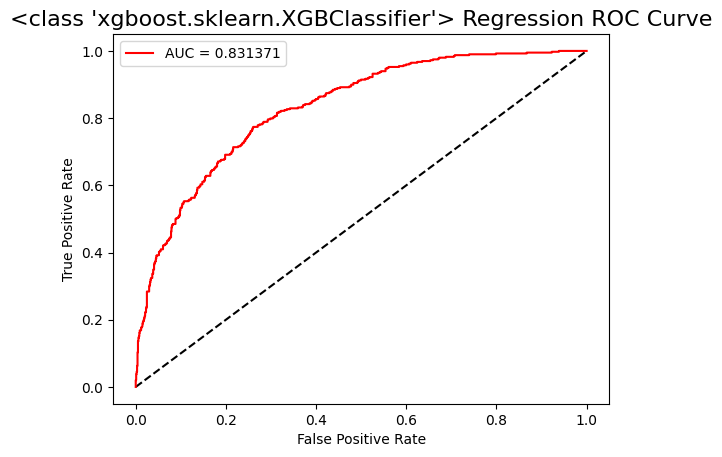

              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1009
           1       0.68      0.53      0.59       398

    accuracy                           0.80      1407
   macro avg       0.75      0.71      0.73      1407
weighted avg       0.79      0.80      0.79      1407



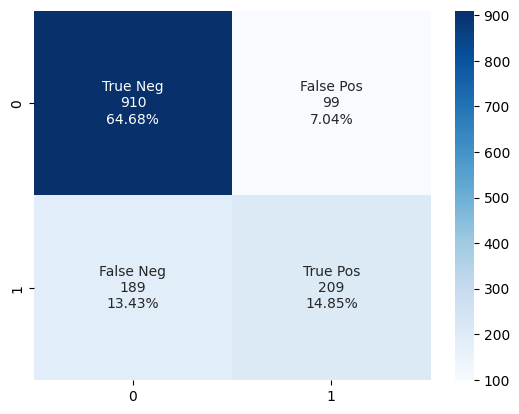

In [44]:
from xgboost import XGBClassifier

xgm_model= XGBClassifier()
model_summary(xgm_model,XGBClassifier)

#### DecisionTreeClassifier

In [45]:
from sklearn.tree import DecisionTreeClassifier

Cross Validation Score :  65.26%
ROC_AUC Score :  65.37%


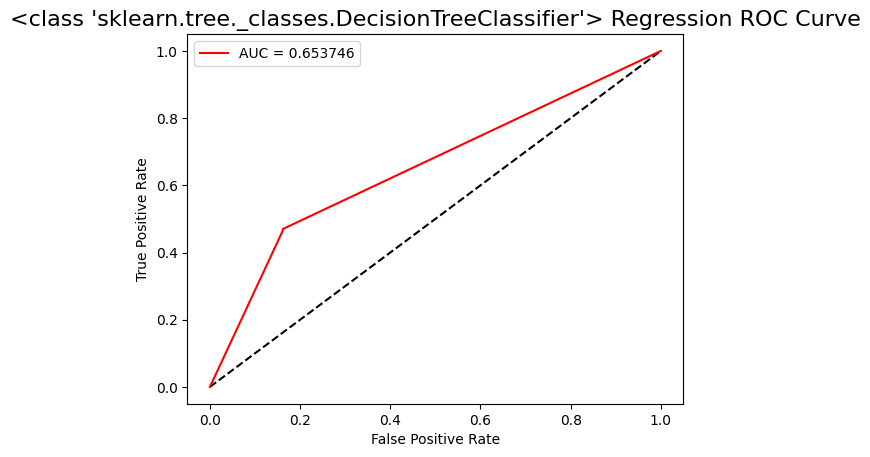

              precision    recall  f1-score   support

           0       0.80      0.84      0.82      1009
           1       0.53      0.46      0.50       398

    accuracy                           0.73      1407
   macro avg       0.67      0.65      0.66      1407
weighted avg       0.72      0.73      0.73      1407



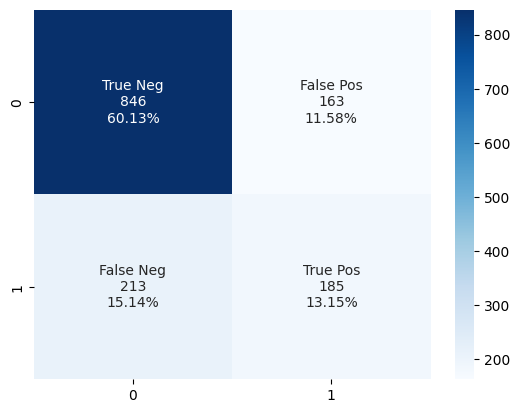

In [46]:
dt_model = DecisionTreeClassifier()
model_summary(dt_model,DecisionTreeClassifier)

#### LGBMClassifier

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1471, number of negative: 4154
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002618 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 637
[LightGBM] [Info] Number of data points in the train set: 5625, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.261511 -> initscore=-1.038129
[LightGBM] [Info] Start training from score -1.038129
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1177, number of negative: 3323
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000875 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wis

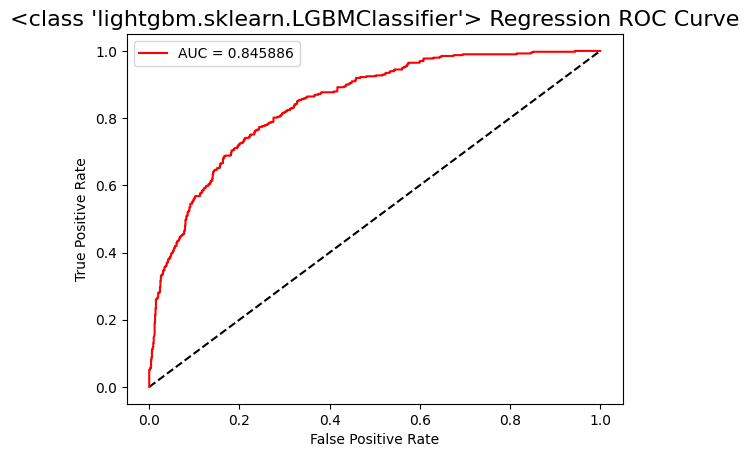

              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1009
           1       0.70      0.54      0.61       398

    accuracy                           0.81      1407
   macro avg       0.77      0.73      0.74      1407
weighted avg       0.80      0.81      0.80      1407



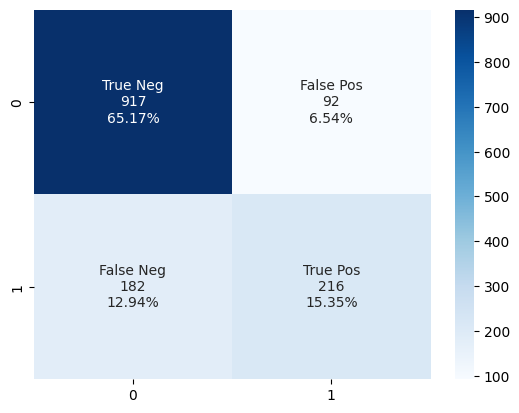

In [47]:
from lightgbm import LGBMClassifier

classifier_lgbm = LGBMClassifier()
model_summary(classifier_lgbm,LGBMClassifier)

#   <a id = "9"></a> <center><font >Hyperparameter Optimization   <font><center>

In [48]:
def summary_hyper():
    #knn_hyper = KNeighborsClassifier()
    log_hyper = LogisticRegression()
    xgm_hyper = XGBClassifier()
    dt_hyper = DecisionTreeClassifier()
    lgbm_hyper = LGBMClassifier()
    hypers=[log_hyper,dt_hyper,xgm_hyper,lgbm_hyper]
    
    log_param = {  'penalty' : ['l2'],
                'C' : np.logspace(-4, 4 ),
                'solver' : ['lbfgs','newton-cg'],
                'max_iter' : [ 1000] }
    
    xgm_param = {'learning_rate': [0.01],
                'n_estimators': [ 200],
                'max_depth': [4],
                'min_child_weight': [3],}
    
    dt_params= { 'max_depth': [2, 3, 5],
                 'min_samples_leaf': [5, 10, 20],
                 'criterion': ["entropy"]}
    
    lgbm_params = {
                'learning_rate':[0.001], 
                 'max_depth':[3], 
                 'subsample':[0.6],
                 'n_estimators':[600], 
                 'min_child_samples':[10]
                }
 
    # params={ "log_hyper": log_param,
    #         "xgm_hyper":xgm_param,
    #         "dt_hyper":dt_params,
    #         "lgbm_hyper": lgbm_params}
    
    results= []
    params=[log_param,dt_params,xgm_param,lgbm_params]
    for i ,col in enumerate(hypers):
       
        best_hyper = GridSearchCV(col,
                            params[i],
                            cv=5,
                            n_jobs=-1,
                            verbose=1).fit(X, y)
        
        final_hyper = col.set_params(**best_hyper.best_params_).fit(X, y)

        cv_results= cross_validate(final_hyper,
                                X,
                                y,
                                cv=5,
                                scoring=["accuracy", "f1", "roc_auc"])
        results.append(cv_results)
    return results
        # print(f"{col} Hyperparameter Optimization")
        # print("#################################")
       
        # print(f"Test accuracy mean:{cv_results['test_accuracy'].mean()}")
        # print(f"Test F1 mean:{cv_results['test_f1'].mean()}")
        # print(f"Test roc_auc mean: {cv_results['test_roc_auc'].mean()}\n\n")


In [49]:
def result():
    cv=[]
    cv=summary_hyper()
    models=["LogisticRegression", "DecisionTreeClassifier","XGBClassifier","LGBMClassifier"]
    for i, col in enumerate(models):
        print("#########################################################\n\n")
        print(f"{col} Hyperparameter Optimization")
        print("#################################")
        
        print(f"Test accuracy mean:{cv[i]['test_accuracy'].mean()}")
        print(f"Test F1 mean:{cv[i]['test_f1'].mean()}")
        print(f"Test roc_auc mean: {cv[i]['test_roc_auc'].mean()}\n\n")

In [50]:
result()

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Fitting 5 folds for each of 9 candidates, totalling 45 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1495, number of negative: 4130
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001099 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 637
[LightGBM] [Info] Number of data points in the train set: 5625, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265778 -> initscore=-1.016151
[LightGBM] [Info] Start training from score -1.016151
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1495, n